# Итоговая работа по курсу «Python и математика для анализа данных»
## Проектная работа по модулю “Математика и статистика в Python”

- Загрузить файл hr.csv.
- Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).
- Рассчитать и визуализировать корреляционную матрицу для переменных.
- Визуализировать несколько взаимосвязей между переменными.
- С использованием t-test статистики проверить взаимосвязи между несколькими переменными.
- Рассчитать сколько работников работает в каждом департаменте.
- Показать распределение сотрудников по зарплатам.
- Показать распределение сотрудников по зарплатам совместно с департаментами.
- Сколько сотрудников покинули компанию.
- Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.
- Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в Личном кабинете

In [1]:
import pandas as pd
import statistics as st
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## 1.Загрузить файл hr.csv.

In [2]:
dataset = pd.read_csv('HR.csv')

### Общая информация по датасету

In [3]:
dataset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
dataset.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [84]:
dataset.info()
print('')
print("Пропущенные значения отсутствуют")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
salary_value             14999 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB

Пропущенные значения отсутствуют


## 2.Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [85]:
all_stats = []
for i in dataset.columns:
    if dataset[i].dtype != 'object':
        mean =   st.mean(dataset[i])   
        median =   st.median(dataset[i])
        try:
            mode =   st.mode(dataset[i])
        except:
            mode = 0
        minimum =   min(dataset[i])
        maximum =   max(dataset[i])
        stdev =   st.pstdev(dataset[i])
        all_stats.append([i, mean, median, mode, minimum, maximum, stdev])

print('Переменные            |  среднее   |  медиана |', end='')
print('  мода  |  мин   |  макс  |  сред. отклонение')
print('-------------------------------------', end='')
print('---------------------------------')

for row in all_stats:
    print('{: <21} | {: >10.2f} | {: >8.2f} | {: >6.2f} | {: >6.2f} | {: >6.2f} | {: >17.2f}'.format(
        row[0], row[1],  row[2], row[3], row[4], row[5], row[6]))
    
print('')
print('Для некоторых значений рассчитать моду нет возможности, заменял такие случаи на 0')

Переменные            |  среднее   |  медиана |  мода  |  мин   |  макс  |  сред. отклонение
----------------------------------------------------------------------
satisfaction_level    |       0.61 |     0.64 |   0.10 |   0.09 |   1.00 |              0.25
last_evaluation       |       0.72 |     0.72 |   0.55 |   0.36 |   1.00 |              0.17
number_project        |       3.80 |     4.00 |   4.00 |   2.00 |   7.00 |              1.23
average_montly_hours  |     201.05 |   200.00 |   0.00 |  96.00 | 310.00 |             49.94
time_spend_company    |       3.50 |     3.00 |   3.00 |   2.00 |  10.00 |              1.46
Work_accident         |       0.14 |     0.00 |   0.00 |   0.00 |   1.00 |              0.35
left                  |       0.24 |     0.00 |   0.00 |   0.00 |   1.00 |              0.43
promotion_last_5years |       0.02 |     0.00 |   0.00 |   0.00 |   1.00 |              0.14
salary_value          |       1.59 |     2.00 |   1.00 |   1.00 |   3.00 |              0.64

## 3.Рассчитать и визуализировать корреляционную матрицу для переменных.

Можно отметить максимальную из полученных значений обратную корреляцию между признаками satisfaction_level и left - -0,39
и следующую по значениям за ней пару salary_value и left - -0,39


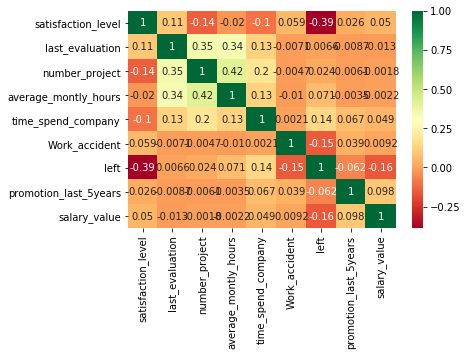

In [90]:
sns.heatmap(dataset.corr(),annot = True, cmap='RdYlGn')

print('Можно отметить максимальную из полученных значений обратную корреляцию между признаками satisfaction_level и left - -0,39')
print('и следующую по значениям за ней пару salary_value и left - -0,39')

## 4.Визуализировать несколько взаимосвязей между переменными.

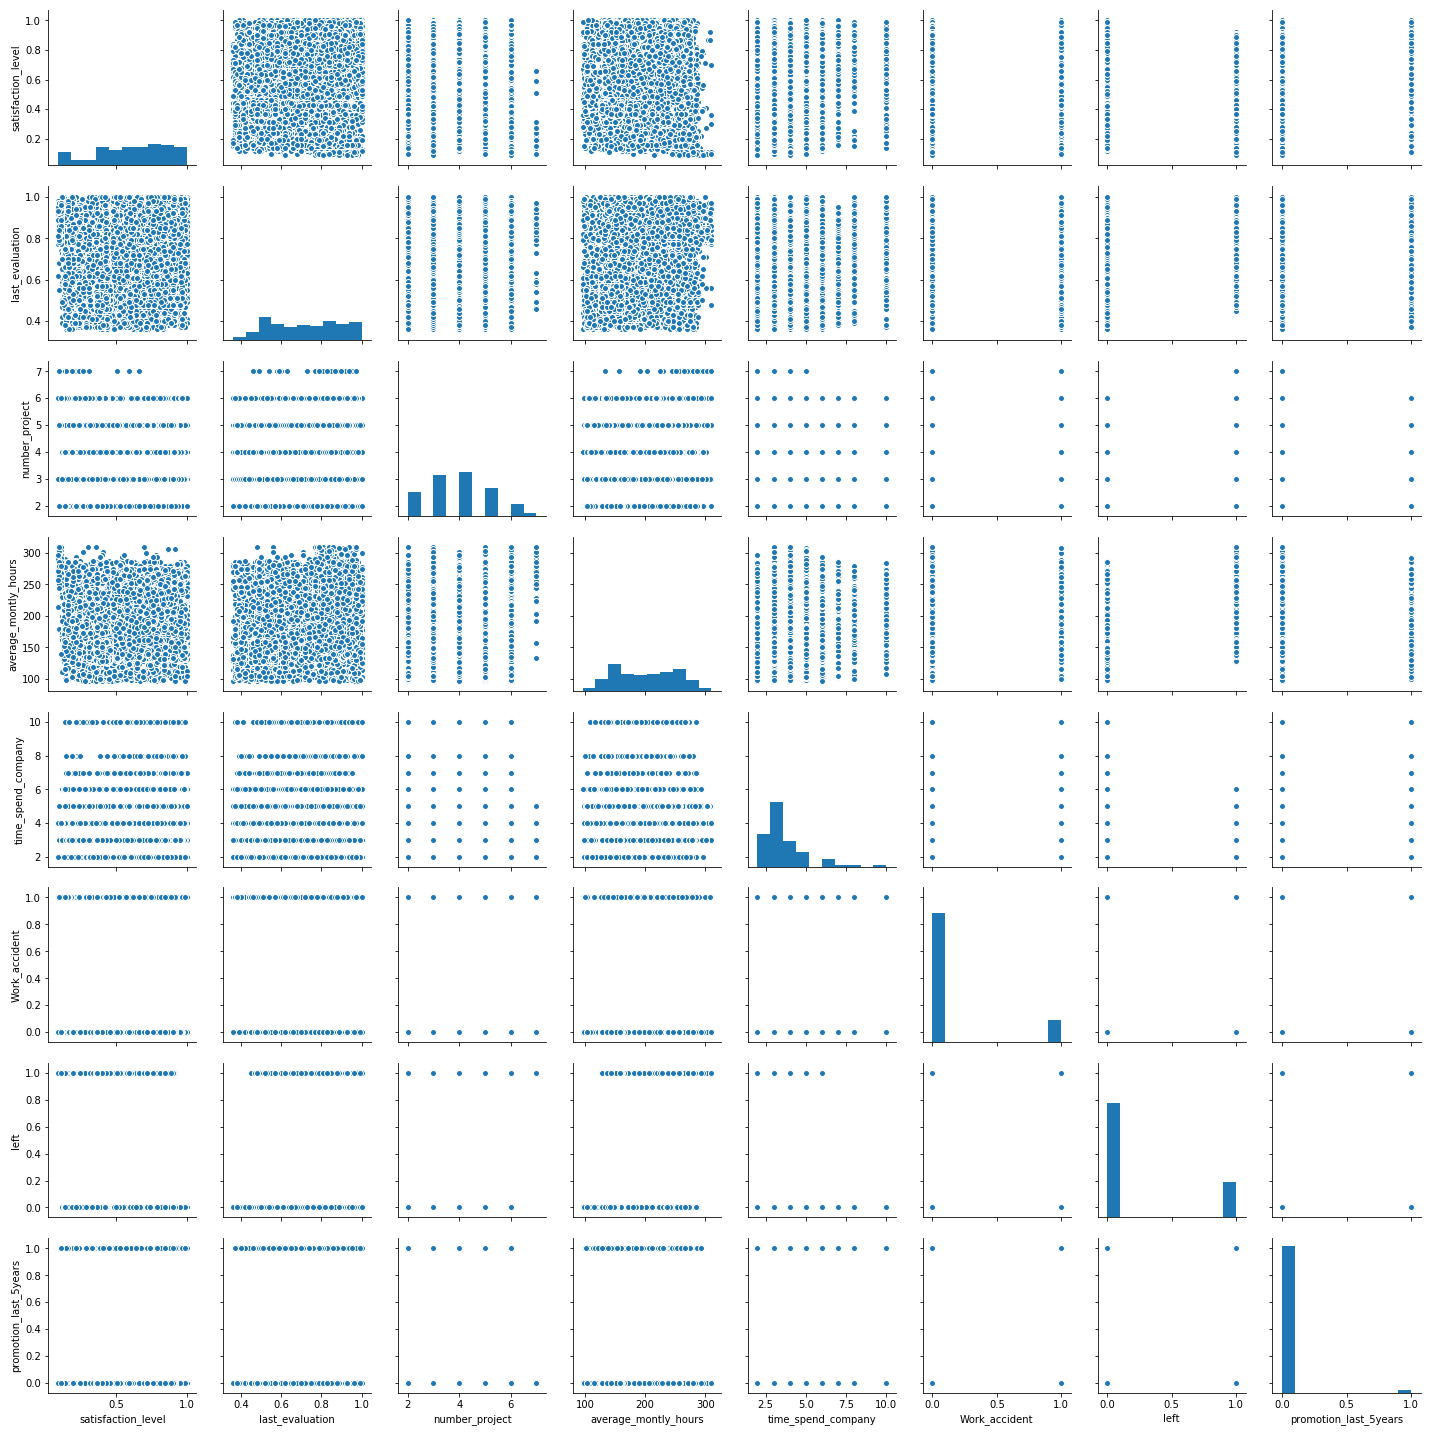

In [8]:
sns.pairplot(dataset)

## 5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

T-test взаимовсвязи между переменными Work_accident и average_montly_hours
T-значение - 1.2421846964457004, P-value - 0.21418784880707778
p-value 0.21 выше стандартной альфа ошибки 0.05, поэтому мы принимаем нулевую гипотезу и можем сказать, что статистического различия между группами нет


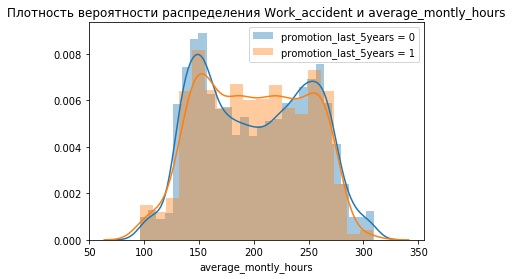

In [99]:
first_val = 'Work_accident'
second_val = 'average_montly_hours'
print('T-test взаимовсвязи между переменными {} и {}'.format(first_val,second_val))
t,p = stats.ttest_ind(dataset[second_val][dataset[first_val] == 0], dataset[second_val][dataset[first_val]  == 1])
print('T-значение - {}, P-value - {}'.format(t,p))
sns.distplot(dataset[second_val][dataset[first_val] == 0])
sns.distplot(dataset[second_val][dataset[first_val]  == 1])
plt.title('Плотность вероятности распределения {} и {}'.format(first_val,second_val))
plt.legend(['promotion_last_5years = 0', 'promotion_last_5years = 1'])
print('p-value 0.21 выше стандартной альфа ошибки 0.05, поэтому мы принимаем нулевую гипотезу и можем сказать, что статистического различия между группами нет')

T-test взаимовсвязи между переменными left и average_montly_hours
T-значение - -8.752254731850009, P-value - 2.3113035567540143e-18
p-value намного меньше стандартной альфа ошибки 0.05, поэтому мы отвергаем нулевую гипотезу и можем сказать, что группы статистически отличаются


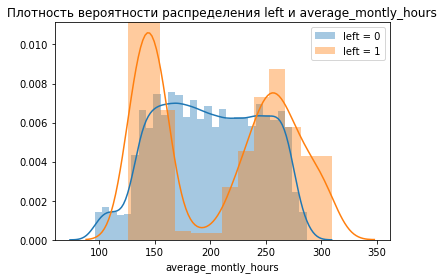

In [95]:
first_val = 'left'
second_val = 'average_montly_hours'
print('T-test взаимовсвязи между переменными {} и {}'.format(first_val,second_val))
t,p = stats.ttest_ind(dataset[second_val][dataset[first_val] == 0], dataset[second_val][dataset[first_val]  == 1])
print('T-значение - {}, P-value - {}'.format(t,p))
sns.distplot(dataset[second_val][dataset[first_val] == 0])
sns.distplot(dataset[second_val][dataset[first_val]  == 1])
plt.title('Плотность вероятности распределения {} и {}'.format(first_val,second_val))
plt.legend(['left = 0', 'left = 1'])
print('p-value намного меньше стандартной альфа ошибки 0.05, поэтому мы отвергаем нулевую гипотезу и можем сказать, что группы статистически отличаются')

T-test взаимовсвязи между переменными left и salary_value
T-значение - 19.58216626170969, P-value - 2.475238171818194e-84
p-value намного меньше стандартной альфа ошибки 0.05, поэтому мы отвергаем нулевую гипотезу и можем сказать, что группы статистически отличаются


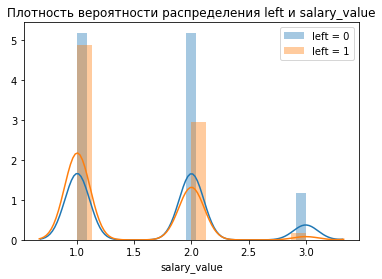

In [96]:
first_val = 'left'
second_val = 'salary_value'
print('T-test взаимовсвязи между переменными {} и {}'.format(first_val,second_val))
t,p = stats.ttest_ind(dataset[second_val][dataset[first_val] == 0], dataset[second_val][dataset[first_val]  == 1])
print('T-значение - {}, P-value - {}'.format(t,p))
sns.distplot(dataset[second_val][dataset[first_val] == 0])
sns.distplot(dataset[second_val][dataset[first_val]  == 1])
plt.title('Плотность вероятности распределения {} и {}'.format(first_val,second_val))
plt.legend(['left = 0', 'left = 1'])
print('p-value намного меньше стандартной альфа ошибки 0.05, поэтому мы отвергаем нулевую гипотезу и можем сказать, что группы статистически отличаются')

## 6.Рассчитать сколько работников работает в каждом департаменте.

In [53]:
dataset.sales.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

## 7.Показать распределение сотрудников по зарплатам.

Для гистограммы преобразовываем зарплаты вида str в int


Text(0.5,1,'Распределение уровня зарплат')

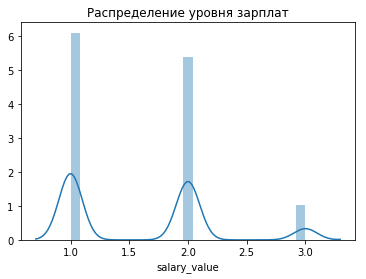

In [47]:
print("Для гистограммы преобразовываем зарплаты вида str в int")
dataset['salary_value'] = dataset['salary'].map({'low': 1, 'medium': 2, 'high': 3})
sns.distplot(dataset.salary_value)
plt.title('Распределение уровня зарплат')

## 8.Показать распределение сотрудников по зарплатам совместно с департаментами.

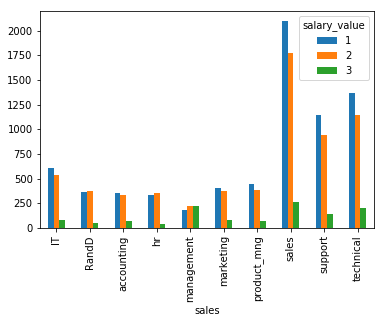

In [82]:
dataset.groupby(['sales','salary_value'])['salary_value'].count().unstack('salary_value').plot(kind='bar')

## 9.Сколько сотрудников покинули компанию.

In [24]:
print("Сотрудников, покинувшних компанию - ",dataset['left'][dataset.left == 1].count())

Сотрудников, покинувшних компанию -  3571


## 10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

Первая гипотеза. Сотрудники с маленькой зарплатой покидают компанию чаще
Видим, что это действительно так, распределение зарплат в уволившихся отличается, чаще увольняются с маленькой зарплатой


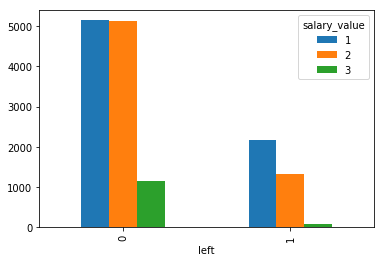

In [100]:
print('Первая гипотеза. Сотрудники с маленькой зарплатой покидают компанию чаще')
dataset.groupby(['left','salary_value'])['salary_value'].count().unstack('salary_value').plot(kind='bar')
print('Видим, что это действительно так, распределение зарплат в уволившихся отличается, чаще увольняются с маленькой зарплатой')

Вторая гипотеза. Наименее удовлетворенные сотрудники чаще увольняются
T-test взаимовсвязи между переменными left и satisfaction_level
T-значение - 51.61280155890104, P-value - 0.0
Видим, p-value намного меньше стандартной альфа ошибки 0.05, а значит группы отличаются и зависимость satisfaction_level и left есть


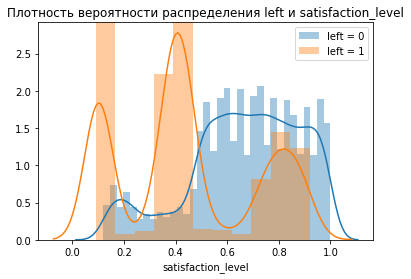

In [104]:
print('Вторая гипотеза. Наименее удовлетворенные сотрудники чаще увольняются')
first_val = 'left'
second_val = 'satisfaction_level'
print('T-test взаимовсвязи между переменными {} и {}'.format(first_val,second_val))
t,p = stats.ttest_ind(dataset[second_val][dataset[first_val] == 0], dataset[second_val][dataset[first_val]  == 1])
print('T-значение - {}, P-value - {}'.format(t,p))
sns.distplot(dataset[second_val][dataset[first_val] == 0])
sns.distplot(dataset[second_val][dataset[first_val]  == 1])
plt.title('Плотность вероятности распределения {} и {}'.format(first_val,second_val))
plt.legend(['left = 0', 'left = 1'])
print('Видим, p-value намного меньше стандартной альфа ошибки 0.05, а значит группы отличаются и зависимость satisfaction_level и left есть')

Третья гипотеза. Сотрудники без повышения в последнии 5 лет покидают компанию чаще
Видим, что сотрудники, у которых было повышение, не покидали компанию


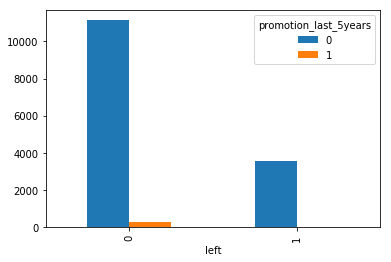

In [106]:
print('Третья гипотеза. Сотрудники без повышения в последнии 5 лет покидают компанию чаще')
dataset.groupby(['left','promotion_last_5years'])['promotion_last_5years'].count().unstack('promotion_last_5years').plot(kind='bar')
print('Видим, что сотрудники, у которых было повышение, не покидали компанию')

Xtndthnfz гипотеза. Распределение увольняющихся зависит от стажа
T-test взаимовсвязи между переменными left и time_spend_company
T-значение - -17.924210234916142, P-value - 4.207680457692835e-71
Видим, p-value намного меньше стандартной альфа ошибки 0.05, а значит группы отличаются и зависимость time_spend_company и left есть


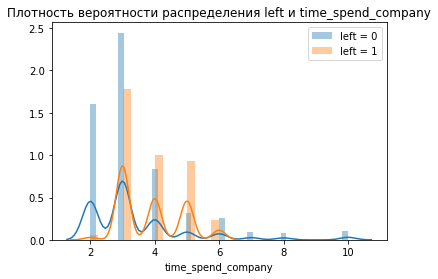

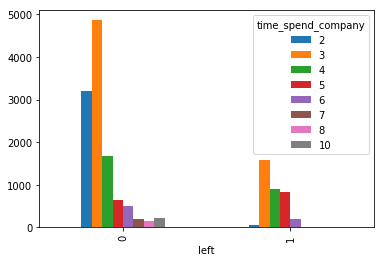

In [110]:
print('Xtndthnfz гипотеза. Распределение увольняющихся зависит от стажа')
first_val = 'left'
second_val = 'time_spend_company'
print('T-test взаимовсвязи между переменными {} и {}'.format(first_val,second_val))
t,p = stats.ttest_ind(dataset[second_val][dataset[first_val] == 0], dataset[second_val][dataset[first_val]  == 1])
print('T-значение - {}, P-value - {}'.format(t,p))
sns.distplot(dataset[second_val][dataset[first_val] == 0])
sns.distplot(dataset[second_val][dataset[first_val]  == 1])
plt.title('Плотность вероятности распределения {} и {}'.format(first_val,second_val))
plt.legend(['left = 0', 'left = 1'])
print('Видим, p-value намного меньше стандартной альфа ошибки 0.05, а значит группы отличаются и зависимость time_spend_company и left есть')
dataset.groupby(['left','time_spend_company'])['time_spend_company'].count().unstack('time_spend_company').plot(kind='bar')
